In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

A set $\mathcal{X}$ in a vector space is convex if for any $a, b \in \mathcal{X}$ the line segment connecting $a$ and $b$ is also in $\mathcal{X}$. In mathematical terms this means that for all $\lambda \in [0, 1]$, we have
$$
\lambda a + (1 - \lambda)b \in \mathcal{X} \text{ whenever } a, b \in \mathcal{X}
$$

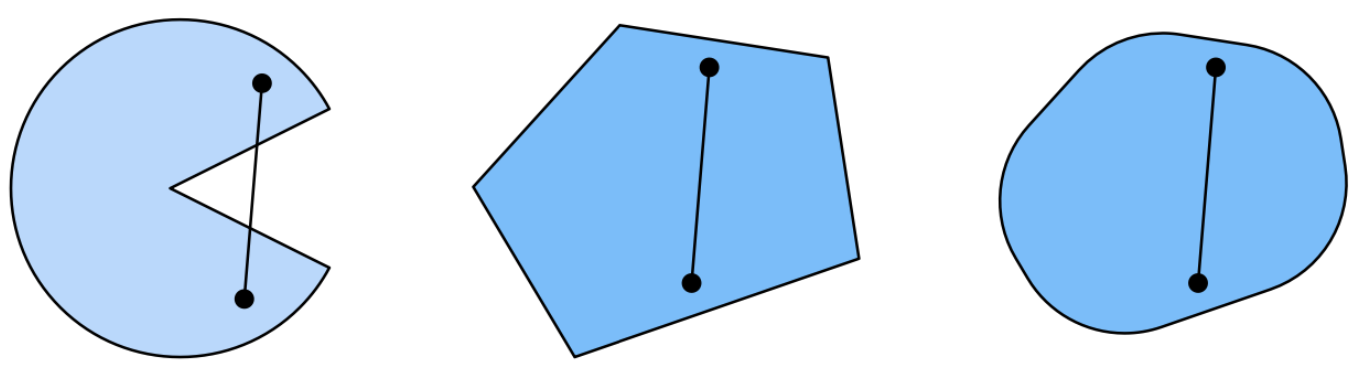

#### Convex Functions

Now that we have convex sets we can introduce convex functions $f$. Given a convex set $\mathcal{X}$, a function $f: \mathcal{X} \rightarrow \mathbb{R}$ is convex if for all $x, x' \in \mathcal{X}$ and for all $\lambda \in [0, 1]$ we have
$$
\lambda f(x) + (1 - \lambda) f(x') \geq f(\lambda x + (1 - \lambda) x')
$$

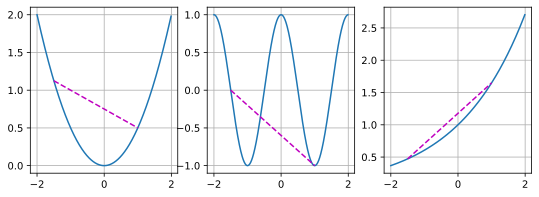

In [2]:
f = lambda x: 0.5 * x**2 # Convex
g = lambda x: torch.cos(np.pi * x) # Nonconvex
h = lambda x: torch.exp(0.5 * x) # Convex

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):

    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)

#### Jensen's Ineqaulity
$$
\sum_i \alpha_i f(x_i) \geq f(\sum_i \alpha_i x_i) \text{ and } \mathbb{E}_X [f(X)] \geq f(\mathbb{E}_X[X])
$$

For example, we can use Jensen's inequality to bound log-likelihood of partially observed random variables.
$$
\mathbb{E}_{Y \sim P(Y)}[-logP(X|Y)] \geq -logP(X)
$$

### 12.2.2 Properties

Convex functions have many useful properties. We describe a few commonly-used ones below.

#### Local Minima Are Global Minima
Let's see this via code:

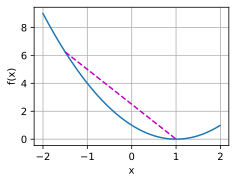

In [3]:
f = lambda x: (x - 1) ** 2
d2l.set_figsize()
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

#### Below Sets of Convex Functions Are Convex
Below set is defined as:
$$
\mathcal{S}_b = \{x | x \in \mathcal{X} \text{ and } f(x) \leq b\}
$$
#### Convexity and Second Derivatives

Hessian of convex function $f$ is positive semi-definite. That is, if $\mathbf{H} = \nabla^2 f(\mathbf{x})$     
$$
\mathbf{y}^T \mathbf{H} \mathbf{y} \geq 0 \text{ } \forall \mathbf{y}
$$
### 12.2.3 Constraints
One of the nice properties of convex optimization is that it allows us to handle constraints efficiently. That is, it allows us to solve constrained optimization problems of the form:

$$
\text{minimize}_{\mathbf{x}} f(\mathbf{x}) \text{ subject to } c_i(\mathbf{x}) \leq 0 \text{ for all } i \in \{1, 2, ...,  \}
$$

where $f$ is the objective and the functions $c_i$ are constraint functions.
#### Lagrangian
The Lagrangian $L$ is defined as follow:
$$
L(\mathbf{x}, \alpha_1, ..., \alpha_n) = f(\mathbf{x}) + \sum_{i=1}^n \alpha_ic_i(\mathbf{x}) \text{ where } \alpha_i \geq 0
$$
The local minimum / maximum occurs where $\nabla L = \mathbf{0}$.
#### Penalties

One way of satisfying contrained optimization problems at least approximately is to adapt the lagrangian $L$. Rather than satisfying $c_i(\mathbf{x}) \leq 0$ we simply add $\alpha_i c_i(\mathbf{x})$ to the objective function $f(x)$. This ensures that constraints will not be violated too badly.

#### Projections
An alternative strategy for satisfying constraints is projections. More generally, a projection on a convex set $\mathcal{X}$ is defined as 

$$
Proj_{\mathcal{X}}(\mathbf{x}) = argmin_{\mathbf{x}' \in \mathcal{X}} ||\mathbf{x} - \mathbf{x'}||
$$
which is the closest point in $\mathcal{X}$ to $\mathbf{x}$.